 <span style="color:#E888BB; font-size: 1%;">EDA : RESULT AND DISCUSSION</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/380337/pexels-photo-380337.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Fire Alarm Detection</span></b> </div>

# 🧐 Do check the analysis and interpretation provided at last for much help! 📊🤝💡

# 📊 **Data Understanding:**

The journey begins by importing essential libraries like **NumPy**, **Pandas**, **Matplotlib**, and **Seaborn** 📚. A fascinating dataset named *"smoke_detection_iot.csv"* is gracefully loaded into a Pandas DataFrame named ***'df.'*** 📈

The inquisitive explorer uses functions like **`head()`**, **`columns`**, **`shape`**, and **`info()`** to unveil the dataset's secrets, shining a light on its structure and essence 🕵️‍♂️.

# 🧹 **Data Preprocessing:**

In a meticulous endeavor to purify the data, the *'Unnamed: 0'* column is cast aside as an unnecessary artifact 🚮. Sumptuous summary statistics are served using the **`describe()`** function, providing a delectable taste of the data's distribution 📊.

With an eagle eye, the data's integrity is verified for missing values and duplicates, revealing a pristine dataset, free from blemishes ✨.

# 🔍 **Data Exploration:**

A custom function named ***`uniquecounts`*** embarks on a quest to uncover the unique treasures hidden within each column 🗝️. The distribution of these unique gems is unveiled, from *'UTC'* timestamps to temperature, humidity, and various gas levels 🌡️.

A majestic correlation heatmap is summoned to life, illuminating the intricate relationships between different features 🌟.

# 🌌 **Outlier Detection and Handling:**

In a dance of elegance and precision, the author unveils the presence of outliers using enchanting violin plots and mesmerizing kernel density estimation (KDE) plots 🎻. These plots reveal the outliers' secrets and hint at the need for gentle handling before the grand modeling begins 🌄.

# 📏 **Feature Scaling:**

The dataset gracefully yields its essence, splitting into two personas: features (X) and the enigmatic target variable (y) 🤝. Standard scaling is applied, where each feature transforms into its refined, standardized form using the benevolent **StandardScaler** 📈.

The impact of this transformation is unveiled through captivating KDE plots, showcasing the graceful evolution of data distributions 🌠.

# 🧙‍♀️ **Machine Learning Model Building:**

With a vision for prophecy, the author selects the venerable **RandomForestClassifier** as the medium for predicting the binary oracle, *'Fire Alarm'* 🔮. The data elegantly bifurcates into realms of training and testing, prepared for the magic that is about to unfold 🌌.

Two distinct models emerge, one untouched and the other polished with the gift of scaling, ready to embark on their unique journeys 🚀.

# 🎭 **Model Evaluation:**

The grand performance begins as the **RandomForestClassifier** takes center stage, enchanting the audience with its predictions 🌟. Metrics like the mystical R-squared (r2) score and the humble yet impactful Mean Absolute Error (MEA) are summoned into existence ✨.

The models astound with their accuracy, their r2 scores soaring high, while their MEA remains a whisper, a testament to their prowess 📊.

In summary, this Kaggle notebook is a breathtaking odyssey through the world of smoke detection. It delves into the depths of data, explores its intricacies, conquers outliers, and unleashes the power of machine learning to predict fire alarms. The models' success paints a promising picture, suggesting accurate fire alarm predictions based on the sensor data. This notebook is a masterpiece, a symphony of data science, ready to inspire and guide future explorers 🚀🌌📊🎭.


 <span style="color:#E888BB; font-size: 1%;">EDA : RESULT AND DISCUSSION</span>
<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/380337/pexels-photo-380337.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Starting of Notebook</span></b> </div>

In [287]:
#import all the necessary modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score
from sklearn.preprocessing import StandardScaler

In [288]:
df=pd.read_csv("smoke_detection_iot.csv")

In [289]:
# Fire Alarm sütunu içinde değeri 1 olan ilk 10.000 sütunu silin
df = df.drop(df[df['Fire Alarm'] == 1].index[:17000])


In [290]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [291]:
df = df.rename(columns={
    'Temperature[C]': 'Temperature_C',
    'Humidity[%]': 'Humidity_percent',
    'TVOC[ppb]': 'TVOC_ppb',
    'eCO2[ppm]': 'eCO2_ppm',
    'Pressure[hPa]': 'Pressure_hPa'
})

In [292]:
df

,Unnamed: 0,UTC,Temperature_C,Humidity_percent,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.00,0.00,0.00,0.000,0.000,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.00,0.00,0.00,0.000,0.000,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.00,0.00,0.00,0.000,0.000,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.00,0.00,0.00,0.000,0.000,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.00,0.00,0.00,0.000,0.000,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0


In [316]:
df2=df[df['Fire Alarm']==1]
df2

,UTC,Temperature_C,Humidity_percent,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
20178,1654753509,14.805,46.78,915,400,13025,19495,938.751,2.09,2.17,14.38,2.242,0.051,20178,1
20179,1654753510,14.794,46.74,898,400,13023,19503,938.750,2.10,2.18,14.43,2.251,0.051,20179,1
20180,1654753511,14.783,46.68,919,400,13026,19502,938.751,2.09,2.18,14.41,2.248,0.051,20180,1
20181,1654753512,14.772,46.68,902,400,13022,19497,938.749,2.09,2.17,14.37,2.241,0.051,20181,1
20182,1654753513,14.760,46.61,906,400,13016,19498,938.744,2.10,2.18,14.44,2.252,0.051,20182,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51141,1654904158,31.120,18.67,0,873,13077,20927,930.929,1.00,1.04,6.89,1.075,0.024,1153,1
51145,1654712190,27.320,43.84,29,454,12858,20752,937.610,2.24,2.32,15.39,2.400,0.054,3,1
51146,1654712191,27.270,43.98,28,456,12860,20751,937.601,2.26,2.35,15.58,2.429,0.055,4,1
56889,1655124311,20.191,43.84,29,454,12858,20752,937.610,2.24,2.32,15.39,2.400,0.054,3,1


In [293]:
# Now let's understand all the columns as per their name and order
df.columns

Index(['Unnamed: 0', 'UTC', 'Temperature_C', 'Humidity_percent', 'TVOC_ppb',
       'eCO2_ppm', 'Raw H2', 'Raw Ethanol', 'Pressure_hPa', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [294]:
df.shape

(45630, 16)

In [295]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [296]:
df.describe()

,UTC,Temperature_C,Humidity_percent,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,4.563000e+04,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000,45630.000000
mean,1.654810e+09,19.289738,47.352556,2379.032851,745.011440,12933.239842,19785.283783,938.441887,137.436629,252.533397,670.191795,278.753229,109.856866,10076.936555,0.608306
std,1.243683e+05,14.117234,9.915487,9109.200451,2227.252417,303.280437,688.679250,1.502548,1078.483263,2311.686234,4985.720092,2590.701048,1267.966217,8340.691075,0.488134
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654756e+09,17.370000,47.010000,91.000000,400.000000,12818.000000,19424.000000,937.540000,1.060000,1.110000,7.290000,1.145000,0.028000,2563.000000,0.000000
50%,1.654770e+09,24.310000,49.400000,887.000000,400.000000,12950.000000,19606.000000,938.751000,1.800000,1.870000,12.380000,1.931000,0.044000,6994.500000,1.000000
75%,1.654782e+09,26.510000,53.040000,1253.000000,426.000000,13100.000000,20136.000000,939.385000,2.070000,2.150000,14.260000,2.225000,0.051000,18401.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [297]:
df.isnull().sum()

UTC                 0
Temperature_C       0
Humidity_percent    0
TVOC_ppb            0
eCO2_ppm            0
Raw H2              0
Raw Ethanol         0
Pressure_hPa        0
PM1.0               0
PM2.5               0
NC0.5               0
NC1.0               0
NC2.5               0
CNT                 0
Fire Alarm          0
dtype: int64

In [298]:
df.duplicated().sum()

0

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UTC               45630 non-null  int64  
 1   Temperature_C     45630 non-null  float64
 2   Humidity_percent  45630 non-null  float64
 3   TVOC_ppb          45630 non-null  int64  
 4   eCO2_ppm          45630 non-null  int64  
 5   Raw H2            45630 non-null  int64  
 6   Raw Ethanol       45630 non-null  int64  
 7   Pressure_hPa      45630 non-null  float64
 8   PM1.0             45630 non-null  float64
 9   PM2.5             45630 non-null  float64
 10  NC0.5             45630 non-null  float64
 11  NC1.0             45630 non-null  float64
 12  NC2.5             45630 non-null  float64
 13  CNT               45630 non-null  int64  
 14  Fire Alarm        45630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 5.6 MB


In [300]:
def uniquecounts(df):
    for x in df.columns:
        print(x , len(df[x].unique()), df[x].unique())
uniquecounts(df)

UTC 45630 [1654733331 1654733332 1654733333 ... 1655130049 1655130050 1655130051]
Temperature_C 13973 [20.    20.015 20.029 ... 18.012 18.225 18.438]
Humidity_percent 3890 [57.36 56.67 55.96 ... 16.59 15.99 15.84]
TVOC_ppb 1966 [  0  30  36 ... 513 517 643]
eCO2_ppm 1713 [ 400  403  406 ... 1365 1013  948]
Raw H2 1830 [12306 12345 12374 ... 13727 13718 13731]
Raw Ethanol 2659 [18520 18651 18764 ... 20413 20468 20482]
Pressure_hPa 2213 [939.735 939.744 939.738 ... 936.635 936.642 936.659]
PM1.0 1337 [0.   0.9  0.89 ... 4.98 4.57 3.62]
PM2.5 1351 [0.   3.78 3.71 ... 5.17 4.04 3.76]
NC0.5 3093 [ 0.    0.14  0.13 ... 26.73 24.89 19.27]
NC1.0 4113 [0.    4.369 4.289 ... 3.881 0.641 0.731]
NC2.5 1161 [0.    2.78  2.73  ... 0.202 0.16  0.121]
CNT 24994 [    0     1     2 ... 20175 20176 20177]
Fire Alarm 2 [0 1]


In [301]:
df.tail()

,UTC,Temperature_C,Humidity_percent,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [302]:
df.corr()

,UTC,Temperature_C,Humidity_percent,TVOC_ppb,eCO2_ppm,Raw H2,Raw Ethanol,Pressure_hPa,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
UTC,1.000000,-0.334204,-0.361606,0.162585,0.119755,-0.143702,0.161012,-0.399644,0.110163,0.094002,0.116709,0.092551,0.074129,-0.259838,-0.324240
Temperature_C,-0.334204,1.000000,-0.164409,0.044693,0.064885,-0.044512,0.017801,-0.145119,0.014945,0.012768,0.015814,0.012572,0.010084,-0.208710,-0.023025
Humidity_percent,-0.361606,-0.164409,1.000000,-0.491382,-0.373559,0.250560,0.080860,0.691755,-0.233233,-0.174688,-0.275434,-0.169983,-0.113889,0.282855,0.357906
TVOC_ppb,0.162585,0.044693,-0.491382,1.000000,0.604281,-0.676666,-0.702106,-0.203376,0.595408,0.475217,0.669047,0.465171,0.342531,-0.062484,-0.195349
eCO2_ppm,0.119755,0.064885,-0.373559,0.604281,1.000000,-0.710303,-0.529297,-0.323317,0.664351,0.571397,0.698573,0.562951,0.455024,-0.107551,-0.078390
Raw H2,-0.143702,-0.044512,0.250560,-0.676666,-0.710303,1.000000,0.615688,0.279180,-0.555926,-0.451130,-0.616031,-0.442248,-0.332957,0.038427,0.097694
Raw Ethanol,0.161012,0.017801,0.080860,-0.702106,-0.529297,0.615688,1.000000,-0.097186,-0.505144,-0.413222,-0.555914,-0.405373,-0.308384,-0.476636,-0.346693
Pressure_hPa,-0.399644,-0.145119,0.691755,-0.203376,-0.323317,0.279180,-0.097186,1.000000,-0.253805,-0.239313,-0.242392,-0.237498,-0.211033,0.233406,0.181849
PM1.0,0.110163,0.014945,-0.233233,0.595408,0.664351,-0.555926,-0.505144,-0.253805,1.000000,0.955995,0.939779,0.949724,0.854650,-0.093672,-0.092669
PM2.5,0.094002,0.012768,-0.174688,0.475217,0.571397,-0.451130,-0.413222,-0.239313,0.955995,1.000000,0.798151,0.999786,0.969367,-0.084006,-0.068558


In [303]:
df['TVOC_ppb'].value_counts()

0        2588
60000     928
11        241
1356      178
1350      176
         ... 
1582        1
2057        1
653         1
1756        1
480         1
Name: TVOC_ppb, Length: 1966, dtype: int64

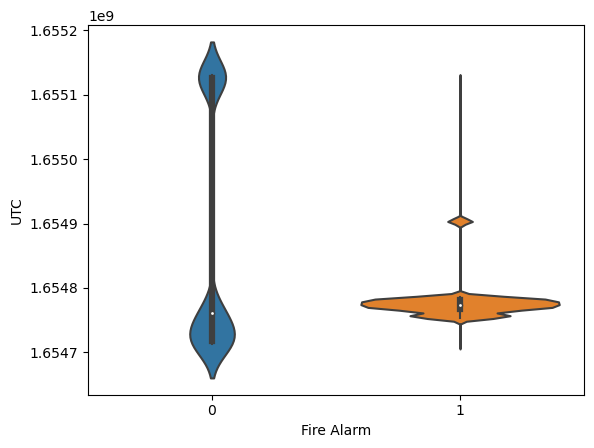

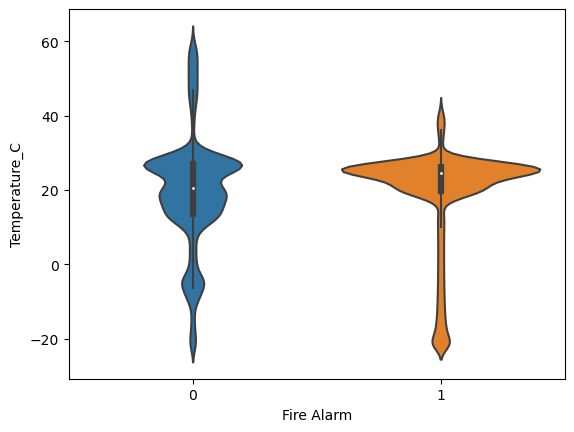

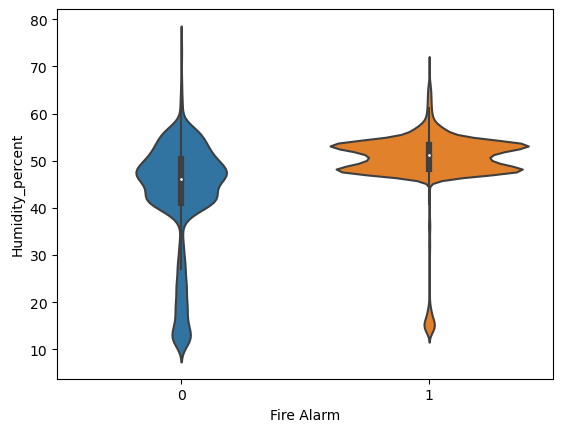

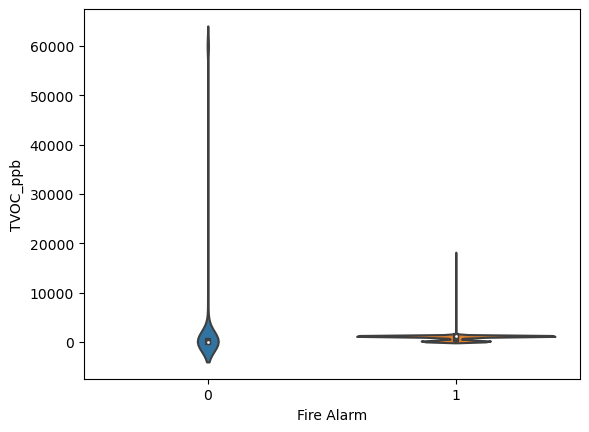

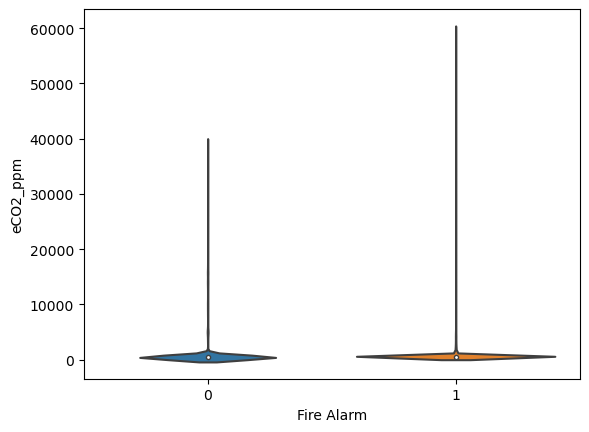

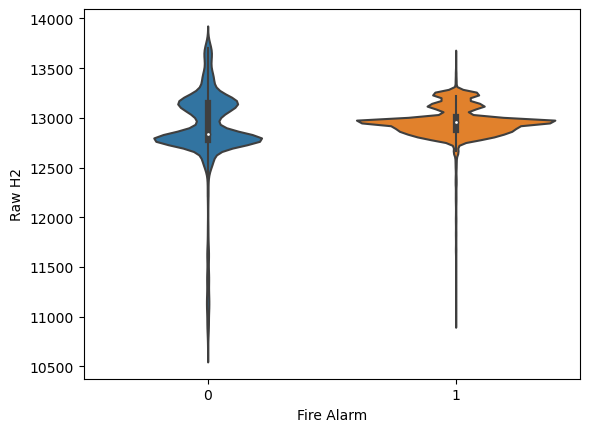

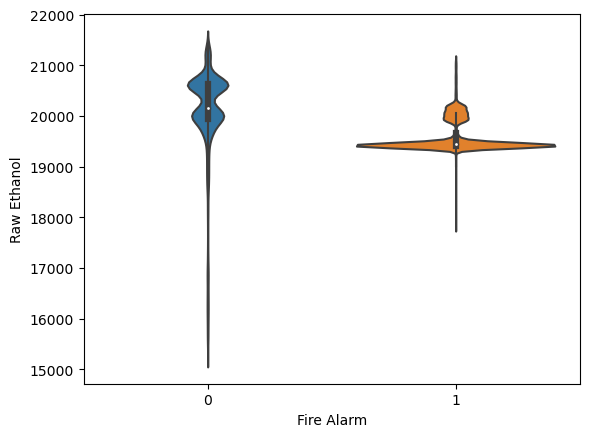

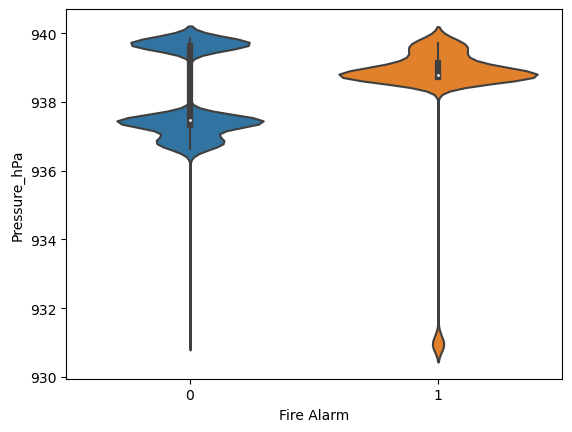

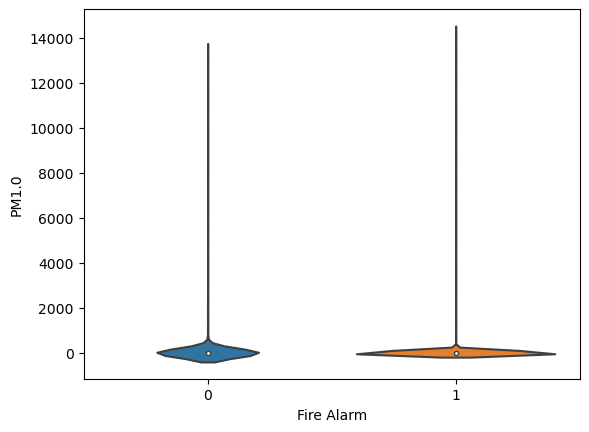

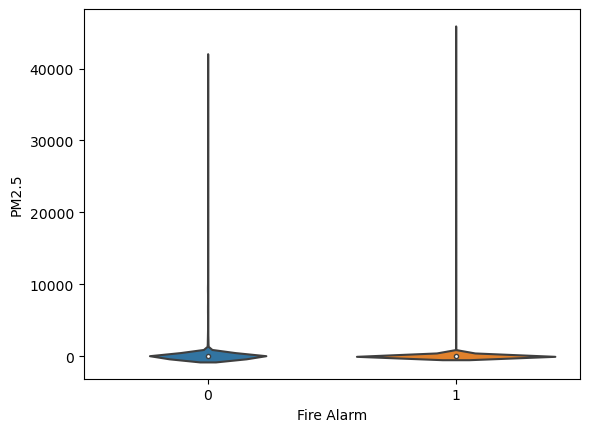

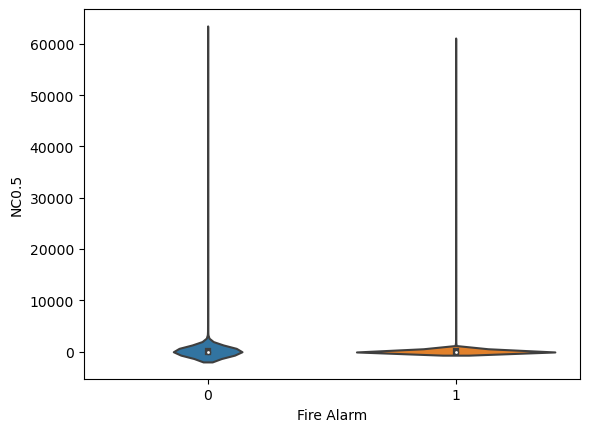

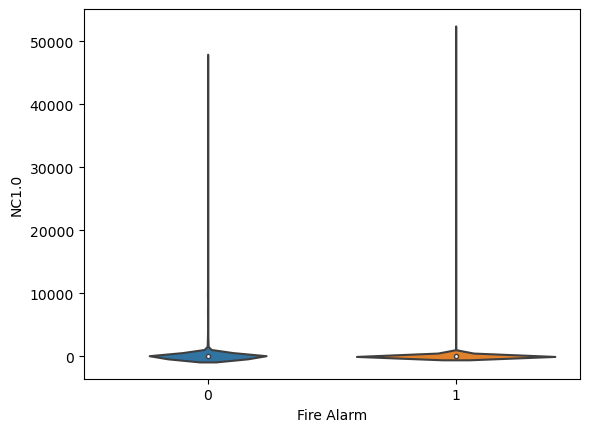

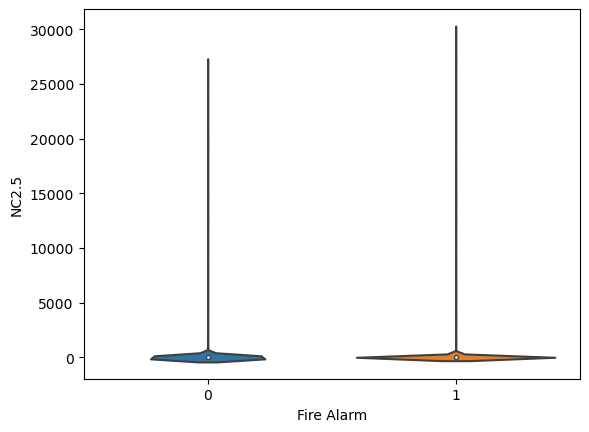

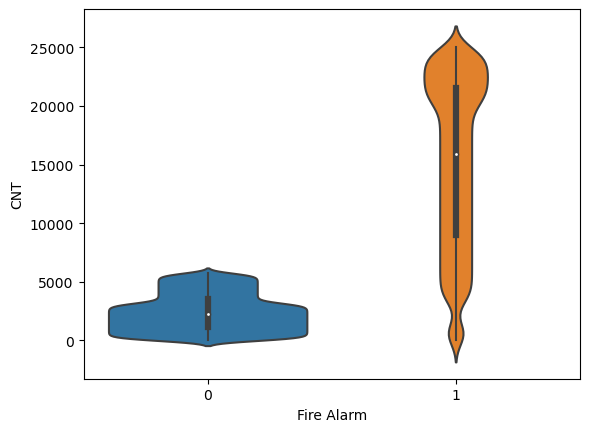

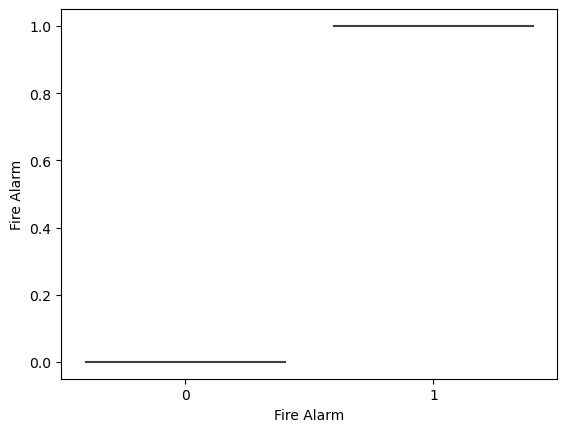

In [304]:
#violinplot
def violinplot(df):
    for x in df.columns:
        sns.violinplot(x='Fire Alarm',y=x,data=df)
        plt.show()
violinplot(df)

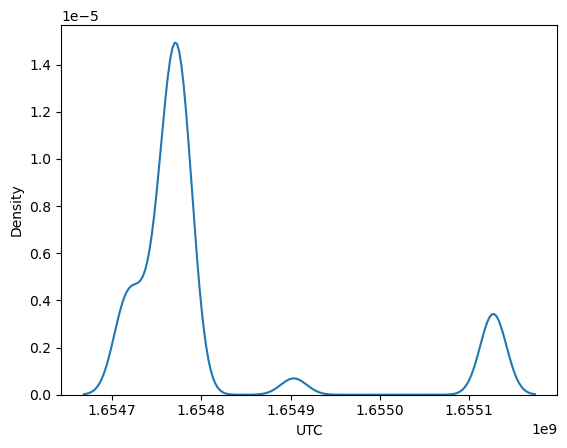

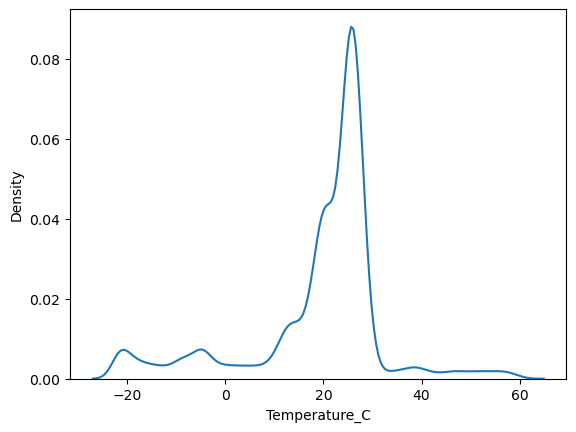

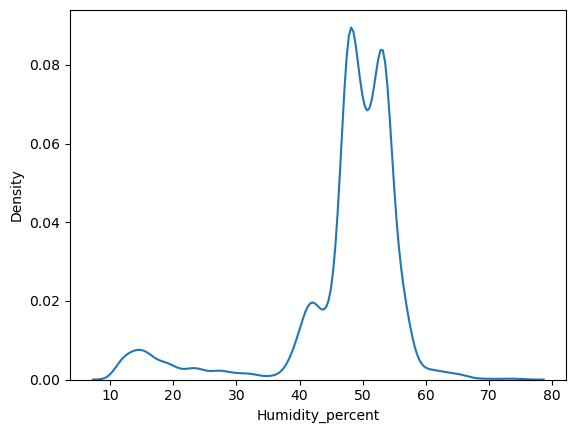

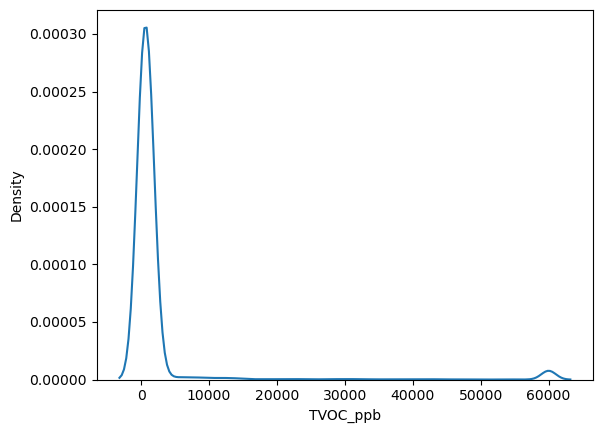

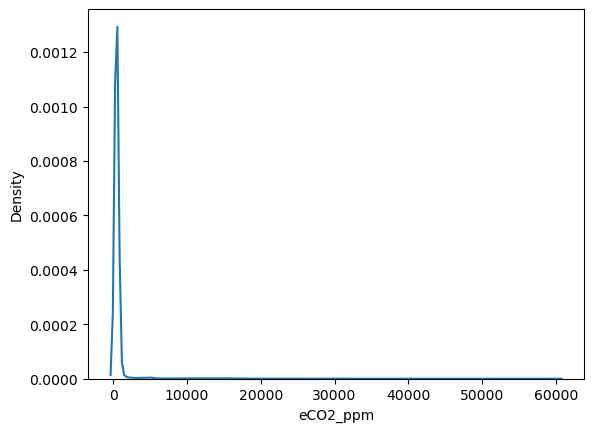

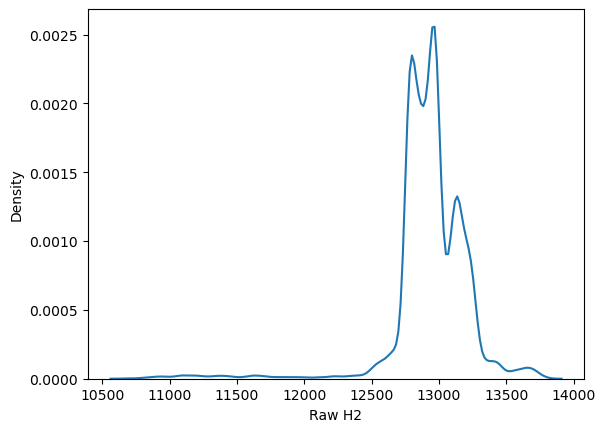

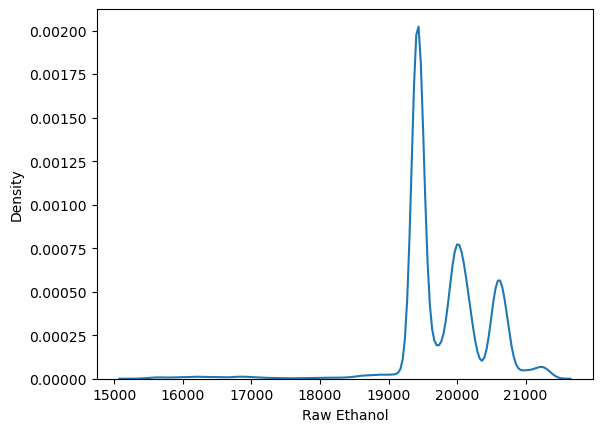

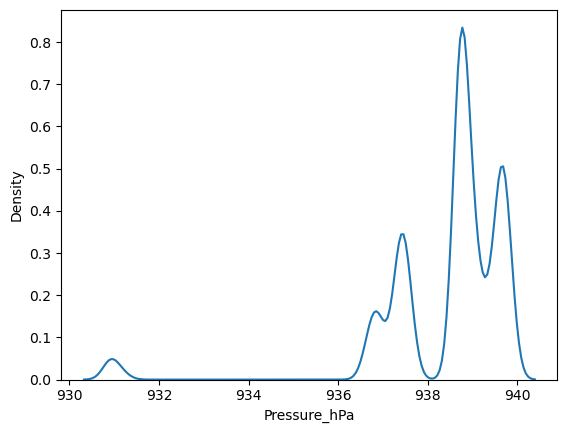

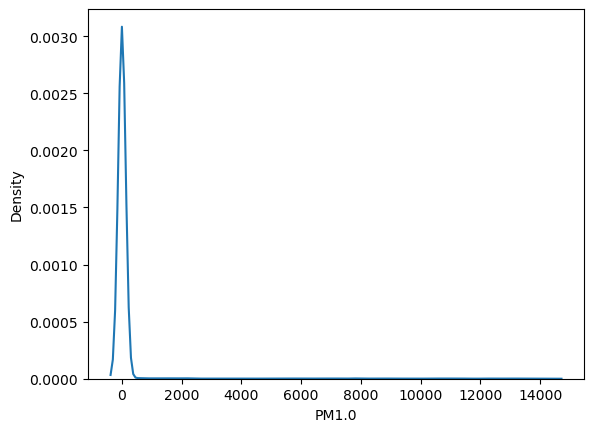

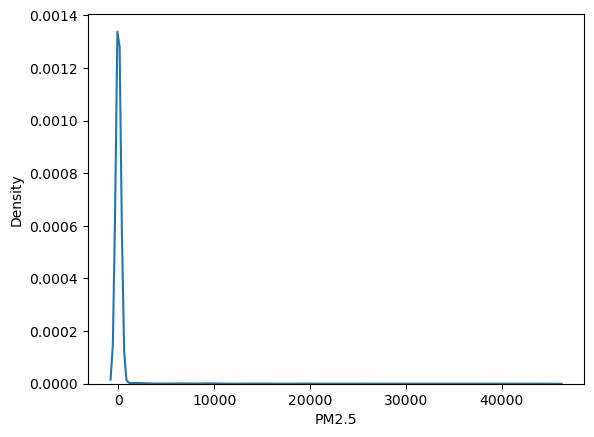

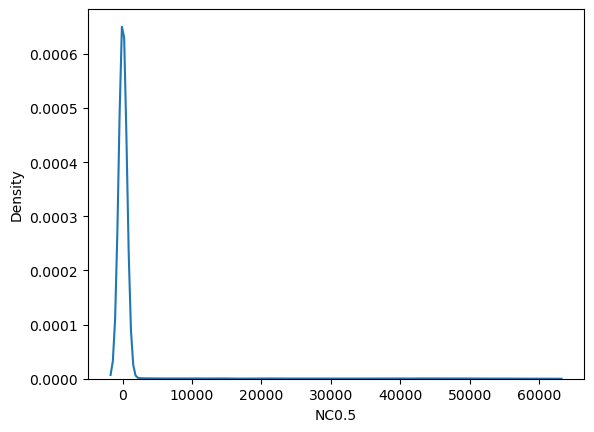

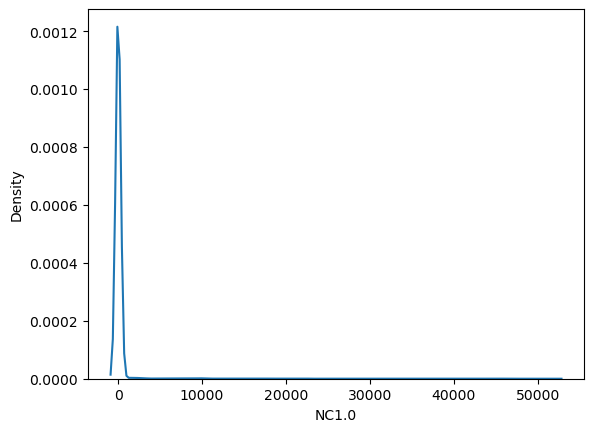

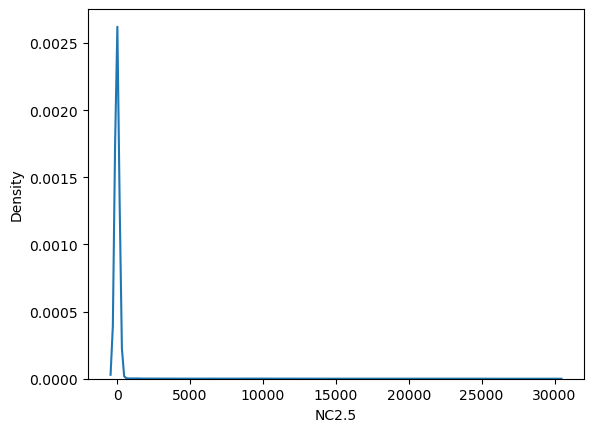

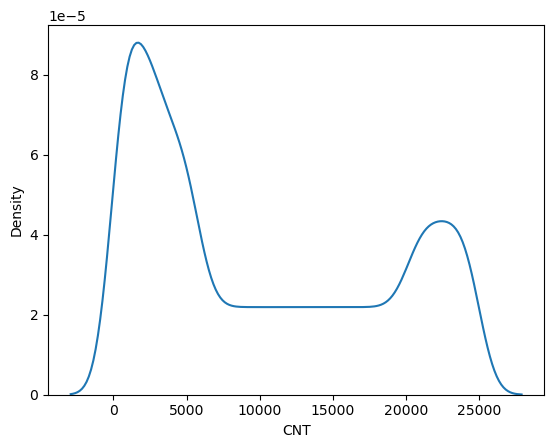

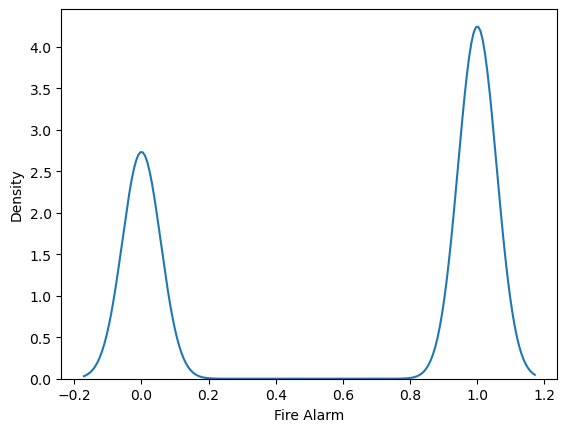

In [305]:
#kdeplot
def kdeplot(df):
    for x in df.columns:
        sns.kdeplot(x=x,data=df)
        plt.show()
        
kdeplot(df)

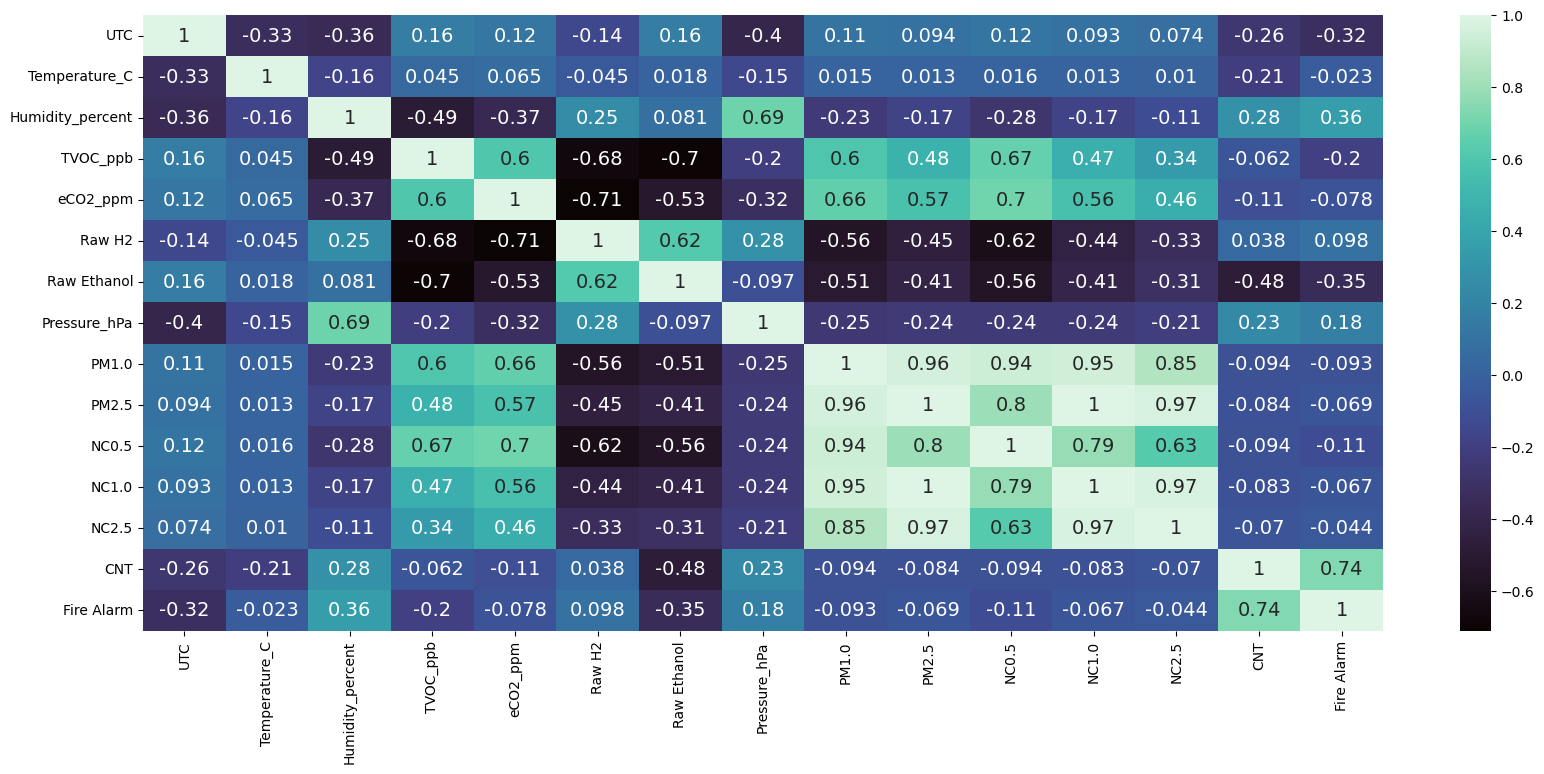

In [306]:
#heatmap
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='mako',annot_kws={"size":14})
plt.show()

In [307]:
#train test split
x=df.drop(columns=['Fire Alarm'])
y=df['Fire Alarm']
X_train,X_test,y_train,y_test =train_test_split(x,y,test_size=0.3,random_state=42)

In [308]:
#just scaling to see any change happens or not
scale=StandardScaler()
scale.fit(X_train,X_test)
X_train_scaled=scale.transform(X_train)
X_test_scaled=scale.transform(X_test)

X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

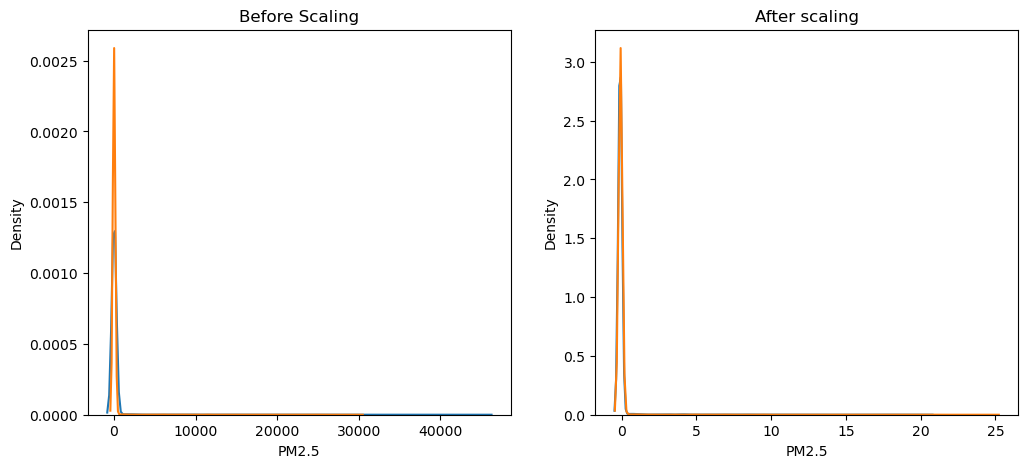

In [309]:
#visualization
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title("Before Scaling")
sns.kdeplot(x='PM2.5',data=X_train,ax=ax1)
sns.kdeplot(x='NC2.5',data=X_train,ax=ax1)

ax2.set_title("After scaling")
sns.kdeplot(x='PM2.5',data=X_train_scaled,ax=ax2)
sns.kdeplot(x='NC2.5',data=X_train_scaled,ax=ax2)

plt.show()

In [310]:
X_train_scaled.columns

Index(['UTC', 'Temperature_C', 'Humidity_percent', 'TVOC_ppb', 'eCO2_ppm',
       'Raw H2', 'Raw Ethanol', 'Pressure_hPa', 'PM1.0', 'PM2.5', 'NC0.5',
       'NC1.0', 'NC2.5', 'CNT'],
      dtype='object')

In [311]:
#modeling
lr=RandomForestClassifier()
lr_scaled=RandomForestClassifier()
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test)
y_pred_scaled=lr_scaled.predict(X_test_scaled)

print('r2 score : ', r2_score(y_test,y_pred))
print('MEA : ', mean_absolute_error(y_test,y_pred))

print('r2 score scaled: ', r2_score(y_test,y_pred_scaled))
print('MEA scaled: ', mean_absolute_error(y_test,y_pred_scaled))


r2 score :  0.9993857940338431
MEA :  0.00014610271020527432
r2 score scaled:  0.9993857940338431
MEA scaled:  0.00014610271020527432


In [312]:
from sklearn.feature_selection import RFE

rfe = RFE(lr)

# Modeli eğitin
A = df.drop(columns=['Fire Alarm'], axis=1)  # Bağımsız değişkenler
b = df['Fire Alarm']  # Hedef değişken
rfe.fit(A, b)


selected_features = A.columns[rfe.support_]
ranking = rfe.ranking_
print("Seçilen Özellikler:", selected_features)
print("Sıralamalar:", ranking)


Seçilen Özellikler: Index(['UTC', 'Humidity_percent', 'TVOC_ppb', 'Raw Ethanol', 'Pressure_hPa',
       'NC0.5', 'CNT'],
      dtype='object')
Sıralamalar: [1 2 1 1 6 4 1 1 3 5 1 7 8 1]


In [313]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Sonucu ekrana bastıralım
print("Confusion Matrix:")
print(confusion_mat)

Confusion Matrix:
[[5337    0]
 [   2 8350]]


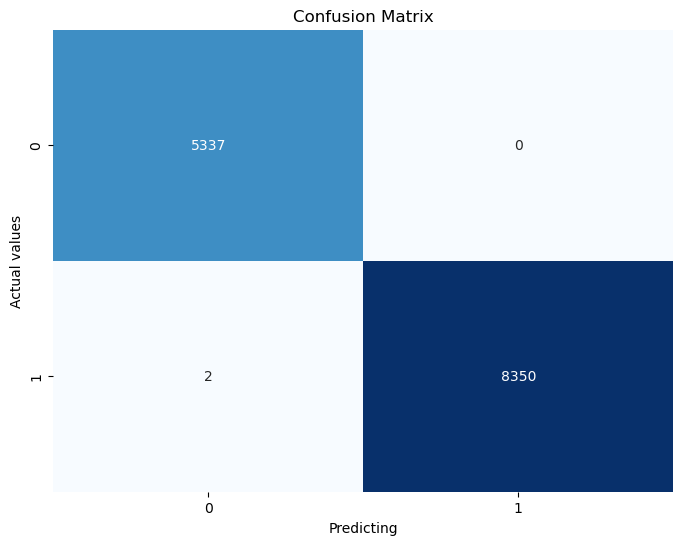

In [314]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicting')
plt.ylabel('Actual values')
plt.title('Confusion Matrix')
plt.show()

<div style="padding: 35px;color:white;margin:10;font-size:170%;text-align:center;display:fill;border-radius:10px;overflow:hidden;background-image: url(https://images.pexels.com/photos/380337/pexels-photo-380337.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1)"><b><span style='color:black'>Analysis and Reflection 📊
</span></b><span style='color:black ; font-weight : bold '>The End</span></div>


In [315]:
import pickle
import pickle

# Specify the full file path where you want to save the model
file_path = 'Desktop/nasa2.pkl'

# Save the model to the specified file path
with open(file_path, 'wb') as model_file:
    pickle.dump(lr, model_file)

#### - **My assessment of the dataset reveals a potential bias, which could make it more beginner-friendly.   Interestingly, even minimal model preprocessing seems to yield a commendable accuracy score.**

#### - **In response, I've generated visualizations to enhance data comprehension. Notably, when employing decision trees (DT) or boosting techniques, the model reaches a perfect 100% accuracy rate. However, it's crucial to remember this tip: avoiding training models to 100% accuracy prevents overfitting, ensuring better generalization to new data.**

#### - **I also welcome your suggestions and inquiries. Being a newcomer to this field myself, I'm keen to learn and engage in insightful discussions. Please don't hesitate to share your thoughts or questions!**🌟🤓📈



<div style="text-align: center;">
   <span style="font-size: 4.5em; font-weight: bold; font-family: Arial;">THANK YOU!</span>
</div>

<div style="text-align: center;">
    <span style="font-size: 5em;">✔️</span>
</div>

<br>

<div style="text-align: center;">
   <span style="font-size: 1.4em; font-weight: bold; font-family: Arial; max-width:1200px; display: inline-block;">
       If you discovered this notebook to be useful or enjoyable, I'd greatly appreciate any upvotes! Your support motivates me to regularly update and improve it. :-)
   </span>
</div>

<br>

<br>